In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib import pyplot as plt

## from CD8T

### contact

In [2]:
# df.loc[df.index[df.index.str.startswith('CD8T_')],'17s30980_Tumor'].to_dict()

In [3]:
# np.asarray([G.edges[e]['weight'] for e in G.edges()])

In [4]:
# df.loc[df.index[df.index.str.startswith('CD8T_')],['17s30980_Tumor','18s18941_Tumor','178248A_Tumor','18s18941_t2_Tumor']]

In [5]:
# df.loc[df.index[df.index.str.startswith('CD8T_')],['17s30980_Tumor','18s18941_Tumor','178248A_Tumor','18s18941_t2_Tumor']].T.values.flatten().tolist()

In [6]:
cells = ['CAF','Macrophage','CD8T','Hepatocyte','B cell','Endothelial','CD4T','Smooth muscle','Neutrophil']

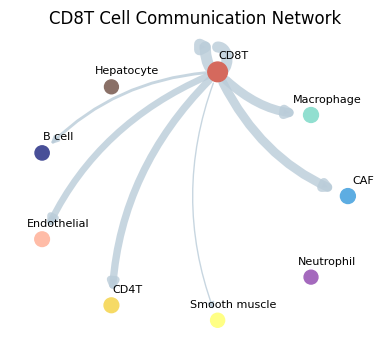

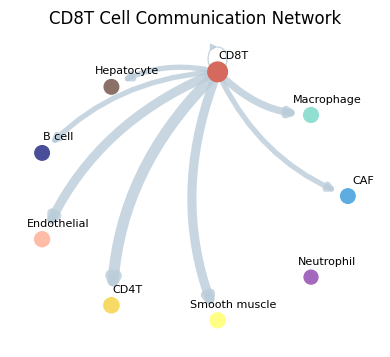

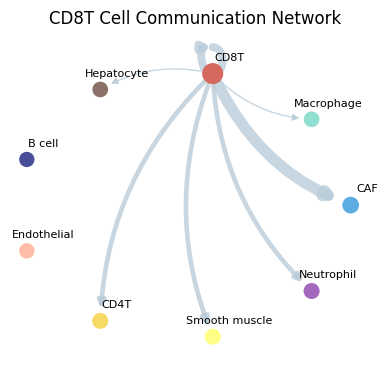

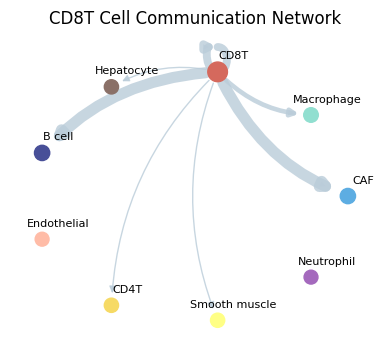

In [7]:
df = pd.read_csv('/csb2/finishedProject/HuiLiJian_DN_2025/10x_HD/5-final/test/SOAPy/CCC_csv/filter/CCC.contact.strength2.p0.05.N.csv',index_col=0)
# 简化版 - 更接近你之前的networkx代码风格
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 数据
# data = {
#     'CD8T_CAF': 12,
#     'CD8T_Macrophage': 12,
#     'CD8T_CD8T': 15,
#     'CD8T_Hepatocyte': 0,
#     'CD8T_B cell': 4,
#     'CD8T_Endothelial': 9,
#     'CD8T_CD4T': 10,
#     'CD8T_Smooth muscle': 2,
#     'CD8T_Neutrophil': 0
# }
for i in ['17s30980_Tumor','18s18941_Tumor','178248A_Tumor','18s18941_t2_Tumor']:
    data = df.loc[df.index[df.index.str.startswith('CD8T_')],i].to_dict()
    # 创建邻接矩阵样式的DataFrame
    adj_matrix = pd.DataFrame(0, index=cells, columns=cells)
    
    # 填充权重（从CD8T到其他细胞）
    for key, weight in data.items():
            target = key.replace('CD8T_', '')
            adj_matrix.loc['CD8T', target] = weight
    adj_matrix = adj_matrix = adj_matrix.drop(index='Unassigned', columns='Unassigned', errors='ignore')  
    # 创建有向图
    G = nx.from_pandas_adjacency(adj_matrix, create_using=nx.DiGraph())

    # 设置可视化参数（与你的原始代码一致）
    edge_alpha = 0.8
    edge_arrow_size = 10
    edge_width_scale = (1, 8)
    node_alpha = 1
    node_size_scale = (100, 200)
    node_label_offset = (0.1, 0.1)
    node_label_size = 8
    node_label_alpha = .9
    
    # 缩放函数
    def _scale_list(arr, min_val=1, max_val=5):
        arr = np.array(arr)
        arr_min = np.min(arr)
        arr_max = np.max(arr)
        if arr_max - arr_min == 0:
            return np.full_like(arr, (min_val + max_val) / 2)
        scaled_arr = (arr - arr_min) / (arr_max - arr_min) * (max_val - min_val) + min_val
        return scaled_arr
    
    # 设置边宽度
    edge_width = np.asarray([G.edges[e]['weight'] for e in G.edges()])
    edge_width = _scale_list(edge_width, 
                            max_val=edge_width_scale[1], 
                            min_val=edge_width_scale[0])
    
    # 设置节点大小（基于入度和出度）
    node_size = adj_matrix.sum(axis=1).values + adj_matrix.sum(axis=0).values
    node_size = _scale_list(node_size, 
                           max_val=node_size_scale[1], 
                           min_val=node_size_scale[0])
    
    # 设置颜色（简化版）
    edge_color = '#baccd9'
    node_color =  ['#5DADE2', '#91DFD0', '#D5695D', '#8A7067', 
                               '#484F98', '#FFBCA7', '#F6DA65', '#FFFF85', '#A469BD']
    
    # 布局
    pos = nx.circular_layout(G)
    for node, (x, y) in pos.items():
        pos[node] = np.array([x, y * 0.8])
    # 绘制
    fig, ax = plt.subplots(figsize=(4, 6))
    
    # 绘制边
    nx.draw_networkx_edges(
        G,
        pos,
        alpha=edge_alpha,
        arrowsize=edge_arrow_size,
        arrowstyle='-|>',
        width=edge_width,
        edge_color=edge_color,
        connectionstyle="arc3,rad=0.2",
        ax=ax
    )
    
    # 绘制节点
    nx.draw_networkx_nodes(
        G,
        pos,
        node_color=node_color,
        node_size=node_size,
        alpha=node_alpha,
        ax=ax
    )
    
    # 添加标签
    label_options = {"ec": "k", "fc": "white", "alpha": node_label_alpha}
    nx.draw_networkx_labels(
        G,
        {k: v + np.array(node_label_offset) for k, v in pos.items()},
        font_size=node_label_size,
        # bbox=label_options,
        bbox=None,
        ax=ax
    )
    
    ax.set_title('CD8T Cell Communication Network', fontsize=12)
    ax.set_frame_on(False)
    ax.set_aspect('equal')
    
    plt.tight_layout()
    # plt.show()
    plt.savefig(f'/csb2/finishedProject/HuiLiJian_DN_2025/10x_HD/5-final/test/SOAPy/plot/{i}.contact.fromCD8T.pdf')

### secretory

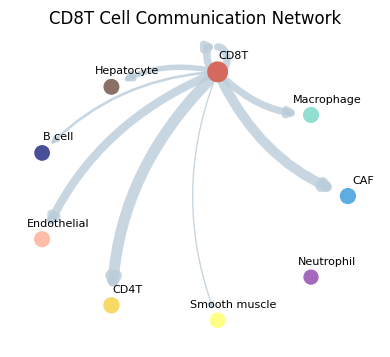

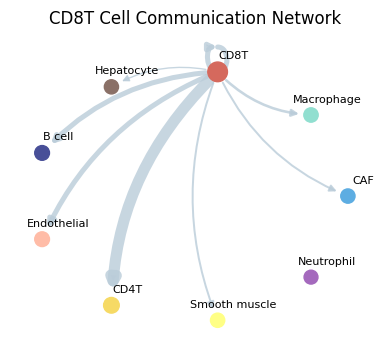

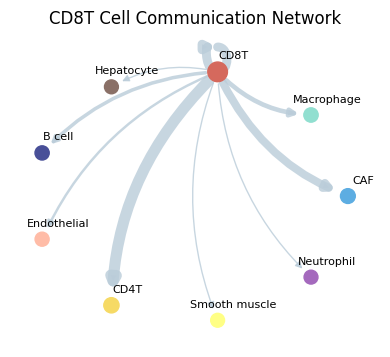

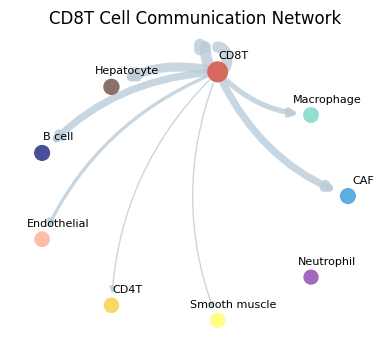

In [8]:
# 简化版 - 更接近你之前的networkx代码风格
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/csb2/finishedProject/HuiLiJian_DN_2025/10x_HD/5-final/test/SOAPy/CCC_csv/filter/CCC.secretory.strength2.p0.05.N.csv',index_col=0)
# 数据
# data = {
#     'CD8T_CAF': 12,
#     'CD8T_Macrophage': 12,
#     'CD8T_CD8T': 15,
#     'CD8T_Hepatocyte': 0,
#     'CD8T_B cell': 4,
#     'CD8T_Endothelial': 9,
#     'CD8T_CD4T': 10,
#     'CD8T_Smooth muscle': 2,
#     'CD8T_Neutrophil': 0
# }
for i in ['17s30980_Tumor','18s18941_Tumor','178248A_Tumor','18s18941_t2_Tumor']:
    data = df.loc[df.index[df.index.str.startswith('CD8T_')],i].to_dict()
    # 创建邻接矩阵样式的DataFrame
    adj_matrix = pd.DataFrame(0, index=cells, columns=cells)
    
    # 填充权重（从CD8T到其他细胞）
    for key, weight in data.items():
            target = key.replace('CD8T_', '')
            adj_matrix.loc['CD8T', target] = weight
    adj_matrix = adj_matrix = adj_matrix.drop(index='Unassigned', columns='Unassigned', errors='ignore') 
    # 创建有向图
    G = nx.from_pandas_adjacency(adj_matrix, create_using=nx.DiGraph())

    # 设置可视化参数（与你的原始代码一致）
    edge_alpha = 0.8
    edge_arrow_size = 10
    edge_width_scale = (1, 8)
    node_alpha = 1
    node_size_scale = (100, 200)
    node_label_offset = (0.1, 0.1)
    node_label_size = 8
    node_label_alpha = .9
    
    # 缩放函数
    def _scale_list(arr, min_val=1, max_val=5):
        arr = np.array(arr)
        arr_min = np.min(arr)
        arr_max = np.max(arr)
        if arr_max - arr_min == 0:
            return np.full_like(arr, (min_val + max_val) / 2)
        scaled_arr = (arr - arr_min) / (arr_max - arr_min) * (max_val - min_val) + min_val
        return scaled_arr
    
    # 设置边宽度
    edge_width = np.asarray([G.edges[e]['weight'] for e in G.edges()])
    edge_width = _scale_list(edge_width, 
                            max_val=edge_width_scale[1], 
                            min_val=edge_width_scale[0])
    
    # 设置节点大小（基于入度和出度）
    node_size = adj_matrix.sum(axis=1).values + adj_matrix.sum(axis=0).values
    node_size = _scale_list(node_size, 
                           max_val=node_size_scale[1], 
                           min_val=node_size_scale[0])
    
    # 设置颜色（简化版）
    edge_color = '#baccd9'
    node_color =  ['#5DADE2', '#91DFD0', '#D5695D', '#8A7067', 
                               '#484F98', '#FFBCA7', '#F6DA65', '#FFFF85', '#A469BD']
    
    # 布局
    pos = nx.circular_layout(G)
    for node, (x, y) in pos.items():
        pos[node] = np.array([x, y * 0.8])
    # 绘制
    fig, ax = plt.subplots(figsize=(4, 6))
    
    # 绘制边
    nx.draw_networkx_edges(
        G,
        pos,
        alpha=edge_alpha,
        arrowsize=edge_arrow_size,
        arrowstyle='-|>',
        width=edge_width,
        edge_color=edge_color,
        connectionstyle="arc3,rad=0.2",
        ax=ax
    )
    
    # 绘制节点
    nx.draw_networkx_nodes(
        G,
        pos,
        node_color=node_color,
        node_size=node_size,
        alpha=node_alpha,
        ax=ax
    )
    
    # 添加标签
    label_options = {"ec": "k", "fc": "white", "alpha": node_label_alpha}
    nx.draw_networkx_labels(
        G,
        {k: v + np.array(node_label_offset) for k, v in pos.items()},
        font_size=node_label_size,
        # bbox=label_options,
        bbox=None,
        ax=ax
    )
    
    ax.set_title('CD8T Cell Communication Network', fontsize=12)
    ax.set_frame_on(False)
    ax.set_aspect('equal')
    
    plt.tight_layout()
    # plt.show()
    plt.savefig(f'/csb2/finishedProject/HuiLiJian_DN_2025/10x_HD/5-final/test/SOAPy/plot/{i}.secretory.fromCD8T.pdf')

In [9]:
adj_matrix

,CAF,Macrophage,CD8T,Hepatocyte,B cell,Endothelial,CD4T,Smooth muscle,Neutrophil
CAF,0,0,0,0,0,0,0,0,0
Macrophage,0,0,0,0,0,0,0,0,0
CD8T,4,3,6,5,4,2,1,1,0
Hepatocyte,0,0,0,0,0,0,0,0,0
B cell,0,0,0,0,0,0,0,0,0
Endothelial,0,0,0,0,0,0,0,0,0
CD4T,0,0,0,0,0,0,0,0,0
Smooth muscle,0,0,0,0,0,0,0,0,0
Neutrophil,0,0,0,0,0,0,0,0,0


### secretory&contact

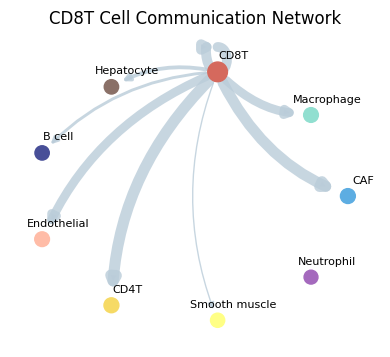

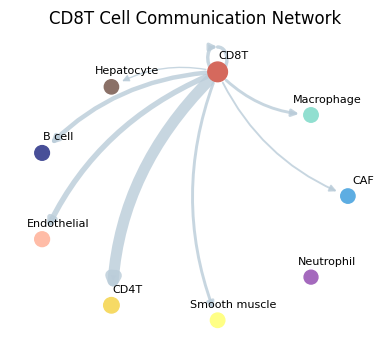

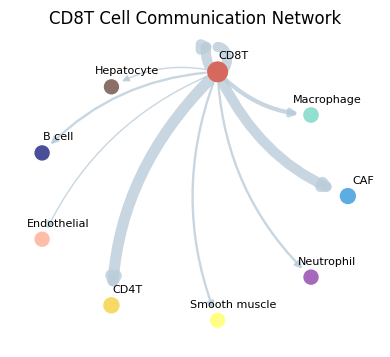

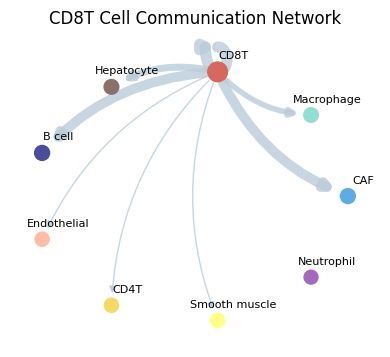

In [10]:

# 简化版 - 更接近你之前的networkx代码风格
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/csb2/finishedProject/HuiLiJian_DN_2025/10x_HD/5-final/test/SOAPy/CCC_csv/filter/CCC.strength2.p0.05.N.csv',index_col=0)
# 数据
# data = {
#     'CD8T_CAF': 12,
#     'CD8T_Macrophage': 12,
#     'CD8T_CD8T': 15,
#     'CD8T_Hepatocyte': 0,
#     'CD8T_B cell': 4,
#     'CD8T_Endothelial': 9,
#     'CD8T_CD4T': 10,
#     'CD8T_Smooth muscle': 2,
#     'CD8T_Neutrophil': 0
# }
for i in ['17s30980_Tumor','18s18941_Tumor','178248A_Tumor','18s18941_t2_Tumor']:
    data = df.loc[df.index[df.index.str.startswith('CD8T_')],i].to_dict()
    # 创建邻接矩阵样式的DataFrame
    adj_matrix = pd.DataFrame(0, index=cells, columns=cells)
    
    # 填充权重（从CD8T到其他细胞）
    for key, weight in data.items():
            target = key.replace('CD8T_', '')
            adj_matrix.loc['CD8T', target] = weight
    adj_matrix = adj_matrix = adj_matrix.drop(index='Unassigned', columns='Unassigned', errors='ignore') 
    # 创建有向图
    G = nx.from_pandas_adjacency(adj_matrix, create_using=nx.DiGraph())

    # 设置可视化参数（与你的原始代码一致）
    edge_alpha = 0.8
    edge_arrow_size = 10
    edge_width_scale = (1, 8)
    node_alpha = 1
    node_size_scale = (100, 200)
    node_label_offset = (0.1, 0.1)
    node_label_size = 8
    node_label_alpha = .9
    
    # 缩放函数
    def _scale_list(arr, min_val=1, max_val=5):
        arr = np.array(arr)
        arr_min = np.min(arr)
        arr_max = np.max(arr)
        if arr_max - arr_min == 0:
            return np.full_like(arr, (min_val + max_val) / 2)
        scaled_arr = (arr - arr_min) / (arr_max - arr_min) * (max_val - min_val) + min_val
        return scaled_arr
    
    # 设置边宽度
    edge_width = np.asarray([G.edges[e]['weight'] for e in G.edges()])
    edge_width = _scale_list(edge_width, 
                            max_val=edge_width_scale[1], 
                            min_val=edge_width_scale[0])
    
    # 设置节点大小（基于入度和出度）
    node_size = adj_matrix.sum(axis=1).values + adj_matrix.sum(axis=0).values
    node_size = _scale_list(node_size, 
                           max_val=node_size_scale[1], 
                           min_val=node_size_scale[0])
    
    # 设置颜色（简化版）
    edge_color = '#baccd9'
    node_color =  ['#5DADE2', '#91DFD0', '#D5695D', '#8A7067', 
                               '#484F98', '#FFBCA7', '#F6DA65', '#FFFF85', '#A469BD']
    
    # 布局
    pos = nx.circular_layout(G)
    for node, (x, y) in pos.items():
        pos[node] = np.array([x, y * 0.8])
    # 绘制
    fig, ax = plt.subplots(figsize=(4, 6))
    
    # 绘制边
    nx.draw_networkx_edges(
        G,
        pos,
        alpha=edge_alpha,
        arrowsize=edge_arrow_size,
        arrowstyle='-|>',
        width=edge_width,
        edge_color=edge_color,
        connectionstyle="arc3,rad=0.2",
        ax=ax
    )
    
    # 绘制节点
    nx.draw_networkx_nodes(
        G,
        pos,
        node_color=node_color,
        node_size=node_size,
        alpha=node_alpha,
        ax=ax
    )
    
    # 添加标签
    label_options = {"ec": "k", "fc": "white", "alpha": node_label_alpha}
    nx.draw_networkx_labels(
        G,
        {k: v + np.array(node_label_offset) for k, v in pos.items()},
        font_size=node_label_size,
        # bbox=label_options,
        bbox=None,
        ax=ax
    )
    
    ax.set_title('CD8T Cell Communication Network', fontsize=12)
    ax.set_frame_on(False)
    ax.set_aspect('equal')
    
    plt.tight_layout()
    # plt.show()
    plt.savefig(f'/csb2/finishedProject/HuiLiJian_DN_2025/10x_HD/5-final/test/SOAPy/plot/{i}.fromCD8T.pdf')

## to CD8T

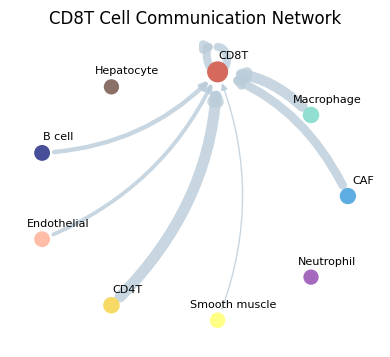

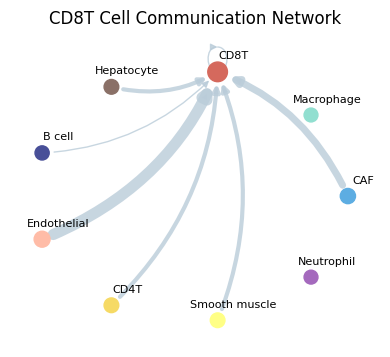

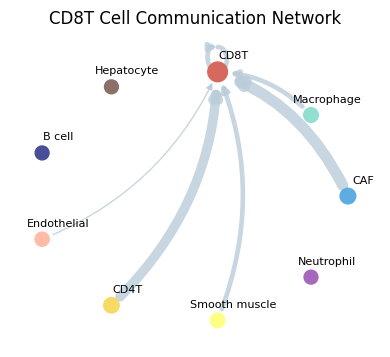

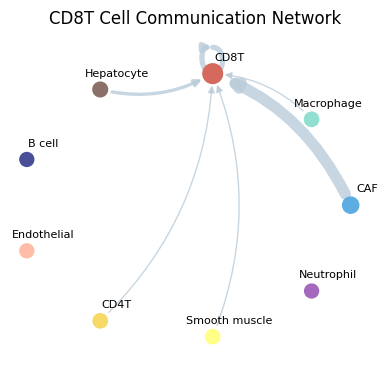

In [11]:
df = pd.read_csv('/csb2/finishedProject/HuiLiJian_DN_2025/10x_HD/5-final/test/SOAPy/CCC_csv/filter/CCC.contact.strength2.p0.05.N.csv',index_col=0)
# 简化版 - 更接近你之前的networkx代码风格
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 数据
# data = {
#     'CD8T_CAF': 12,
#     'CD8T_Macrophage': 12,
#     'CD8T_CD8T': 15,
#     'CD8T_Hepatocyte': 0,
#     'CD8T_B cell': 4,
#     'CD8T_Endothelial': 9,
#     'CD8T_CD4T': 10,
#     'CD8T_Smooth muscle': 2,
#     'CD8T_Neutrophil': 0
# }
for i in ['17s30980_Tumor','18s18941_Tumor','178248A_Tumor','18s18941_t2_Tumor']:
    data = df.loc[df.index[df.index.str.endswith('_CD8T')],i].to_dict()
    # 创建邻接矩阵样式的DataFrame
    adj_matrix = pd.DataFrame(0, index=cells, columns=cells)
    
    # 填充权重（从CD8T到其他细胞）
    for key, weight in data.items():
            target = key.replace('_CD8T', '')
            adj_matrix.loc[target,'CD8T'] = weight
    adj_matrix = adj_matrix = adj_matrix.drop(index='Unassigned', columns='Unassigned', errors='ignore') 
    # 创建有向图
    G = nx.from_pandas_adjacency(adj_matrix, create_using=nx.DiGraph())

    # 设置可视化参数（与你的原始代码一致）
    edge_alpha = 0.8
    edge_arrow_size = 10
    edge_width_scale = (1, 8)
    node_alpha = 1
    node_size_scale = (100, 200)
    node_label_offset = (0.1, 0.1)
    node_label_size = 8
    node_label_alpha = .9
    
    # 缩放函数
    def _scale_list(arr, min_val=1, max_val=5):
        arr = np.array(arr)
        arr_min = np.min(arr)
        arr_max = np.max(arr)
        if arr_max - arr_min == 0:
            return np.full_like(arr, (min_val + max_val) / 2)
        scaled_arr = (arr - arr_min) / (arr_max - arr_min) * (max_val - min_val) + min_val
        return scaled_arr
    
    # 设置边宽度
    edge_width = np.asarray([G.edges[e]['weight'] for e in G.edges()])
    edge_width = _scale_list(edge_width, 
                            max_val=edge_width_scale[1], 
                            min_val=edge_width_scale[0])
    
    # 设置节点大小（基于入度和出度）
    node_size = adj_matrix.sum(axis=1).values + adj_matrix.sum(axis=0).values
    node_size = _scale_list(node_size, 
                           max_val=node_size_scale[1], 
                           min_val=node_size_scale[0])
    
    # 设置颜色（简化版）
    edge_color = '#baccd9'
    node_color =  ['#5DADE2', '#91DFD0', '#D5695D', '#8A7067', 
                               '#484F98', '#FFBCA7', '#F6DA65', '#FFFF85', '#A469BD']
    
    # 布局
    pos = nx.circular_layout(G)
    for node, (x, y) in pos.items():
        pos[node] = np.array([x, y * 0.8])
    # 绘制
    fig, ax = plt.subplots(figsize=(4, 6))
    
    # 绘制边
    nx.draw_networkx_edges(
        G,
        pos,
        alpha=edge_alpha,
        arrowsize=edge_arrow_size,
        arrowstyle='-|>',
        width=edge_width,
        edge_color=edge_color,
        connectionstyle="arc3,rad=0.2",
        ax=ax
    )
    
    # 绘制节点
    nx.draw_networkx_nodes(
        G,
        pos,
        node_color=node_color,
        node_size=node_size,
        alpha=node_alpha,
        ax=ax
    )
    
    # 添加标签
    label_options = {"ec": "k", "fc": "white", "alpha": node_label_alpha}
    nx.draw_networkx_labels(
        G,
        {k: v + np.array(node_label_offset) for k, v in pos.items()},
        font_size=node_label_size,
        # bbox=label_options,
        bbox=None,
        ax=ax
    )
    
    ax.set_title('CD8T Cell Communication Network', fontsize=12)
    ax.set_frame_on(False)
    ax.set_aspect('equal')
    
    plt.tight_layout()
    # plt.show()
    plt.savefig(f'/csb2/finishedProject/HuiLiJian_DN_2025/10x_HD/5-final/test/SOAPy/plot/{i}.contact.toCD8T.pdf')

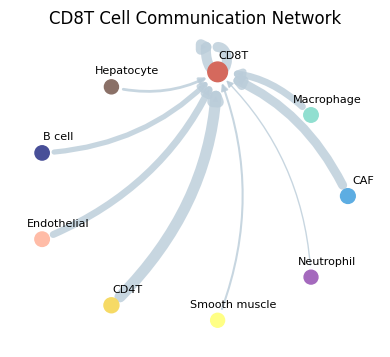

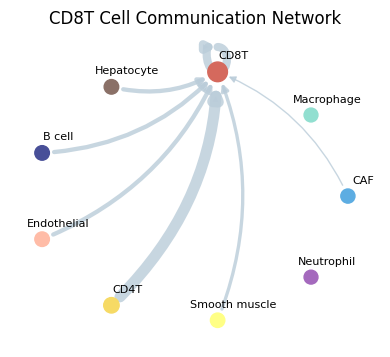

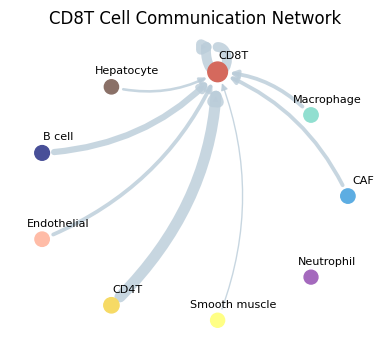

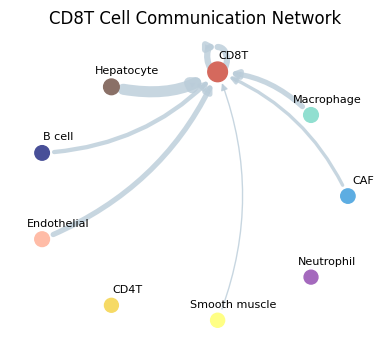

In [14]:
df = pd.read_csv('/csb2/finishedProject/HuiLiJian_DN_2025/10x_HD/5-final/test/SOAPy/CCC_csv/filter/CCC.secretory.strength2.p0.05.N.csv',index_col=0)
# 简化版 - 更接近你之前的networkx代码风格
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 数据
# data = {
#     'CD8T_CAF': 12,
#     'CD8T_Macrophage': 12,
#     'CD8T_CD8T': 15,
#     'CD8T_Hepatocyte': 0,
#     'CD8T_B cell': 4,
#     'CD8T_Endothelial': 9,
#     'CD8T_CD4T': 10,
#     'CD8T_Smooth muscle': 2,
#     'CD8T_Neutrophil': 0
# }
for i in ['17s30980_Tumor','18s18941_Tumor','178248A_Tumor','18s18941_t2_Tumor']:
    data = df.loc[df.index[df.index.str.endswith('_CD8T')],i].to_dict()
    # 创建邻接矩阵样式的DataFrame
    adj_matrix = pd.DataFrame(0, index=cells, columns=cells)
    
    # 填充权重（从CD8T到其他细胞）
    for key, weight in data.items():
            target = key.replace('_CD8T', '')
            adj_matrix.loc[target,'CD8T'] = weight
    adj_matrix = adj_matrix = adj_matrix.drop(index='Unassigned', columns='Unassigned', errors='ignore')  
    # 创建有向图
    G = nx.from_pandas_adjacency(adj_matrix, create_using=nx.DiGraph())

    # 设置可视化参数（与你的原始代码一致）
    edge_alpha = 0.8
    edge_arrow_size = 10
    edge_width_scale = (1, 8)
    node_alpha = 1
    node_size_scale = (100, 200)
    node_label_offset = (0.1, 0.1)
    node_label_size = 8
    node_label_alpha = .9
    
    # 缩放函数
    def _scale_list(arr, min_val=1, max_val=5):
        arr = np.array(arr)
        arr_min = np.min(arr)
        arr_max = np.max(arr)
        if arr_max - arr_min == 0:
            return np.full_like(arr, (min_val + max_val) / 2)
        scaled_arr = (arr - arr_min) / (arr_max - arr_min) * (max_val - min_val) + min_val
        return scaled_arr
    
    # 设置边宽度
    edge_width = np.asarray([G.edges[e]['weight'] for e in G.edges()])
    edge_width = _scale_list(edge_width, 
                            max_val=edge_width_scale[1], 
                            min_val=edge_width_scale[0])
    
    # 设置节点大小（基于入度和出度）
    node_size = adj_matrix.sum(axis=1).values + adj_matrix.sum(axis=0).values
    node_size = _scale_list(node_size, 
                           max_val=node_size_scale[1], 
                           min_val=node_size_scale[0])
    
    # 设置颜色（简化版）
    edge_color = '#baccd9'
    node_color =  ['#5DADE2', '#91DFD0', '#D5695D', '#8A7067', 
                               '#484F98', '#FFBCA7', '#F6DA65', '#FFFF85', '#A469BD']
    
    # 布局
    pos = nx.circular_layout(G)
    for node, (x, y) in pos.items():
        pos[node] = np.array([x, y * 0.8])
    # 绘制
    fig, ax = plt.subplots(figsize=(4, 6))
    
    # 绘制边
    nx.draw_networkx_edges(
        G,
        pos,
        alpha=edge_alpha,
        arrowsize=edge_arrow_size,
        arrowstyle='-|>',
        width=edge_width,
        edge_color=edge_color,
        connectionstyle="arc3,rad=0.2",
        ax=ax
    )
    
    # 绘制节点
    nx.draw_networkx_nodes(
        G,
        pos,
        node_color=node_color,
        node_size=node_size,
        alpha=node_alpha,
        ax=ax
    )
    
    # 添加标签
    label_options = {"ec": "k", "fc": "white", "alpha": node_label_alpha}
    nx.draw_networkx_labels(
        G,
        {k: v + np.array(node_label_offset) for k, v in pos.items()},
        font_size=node_label_size,
        # bbox=label_options,
        bbox=None,
        ax=ax
    )
    
    ax.set_title('CD8T Cell Communication Network', fontsize=12)
    ax.set_frame_on(False)
    ax.set_aspect('equal')
    
    plt.tight_layout()
    # plt.show()
    plt.savefig(f'/csb2/finishedProject/HuiLiJian_DN_2025/10x_HD/5-final/test/SOAPy/plot/{i}.secretory.toCD8T.pdf')

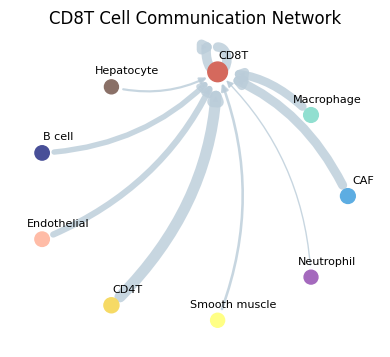

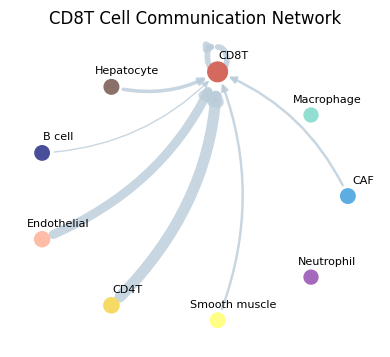

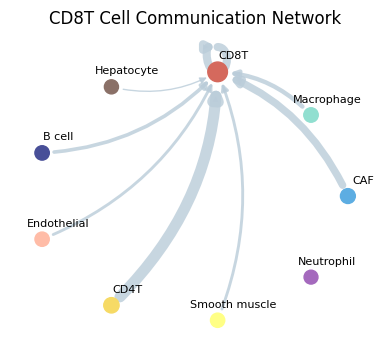

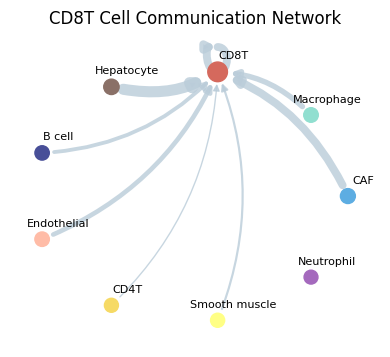

In [15]:
df = pd.read_csv('/csb2/finishedProject/HuiLiJian_DN_2025/10x_HD/5-final/test/SOAPy/CCC_csv/filter/CCC.strength2.p0.05.N.csv',index_col=0)
# 简化版 - 更接近你之前的networkx代码风格
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 数据
# data = {
#     'CD8T_CAF': 12,
#     'CD8T_Macrophage': 12,
#     'CD8T_CD8T': 15,
#     'CD8T_Hepatocyte': 0,
#     'CD8T_B cell': 4,
#     'CD8T_Endothelial': 9,
#     'CD8T_CD4T': 10,
#     'CD8T_Smooth muscle': 2,
#     'CD8T_Neutrophil': 0
# }
for i in ['17s30980_Tumor','18s18941_Tumor','178248A_Tumor','18s18941_t2_Tumor']:
    data = df.loc[df.index[df.index.str.endswith('_CD8T')],i].to_dict()
    # 创建邻接矩阵样式的DataFrame
    adj_matrix = pd.DataFrame(0, index=cells, columns=cells)
    
    # 填充权重（从CD8T到其他细胞）
    for key, weight in data.items():
            target = key.replace('_CD8T', '')
            adj_matrix.loc[target,'CD8T'] = weight
    adj_matrix = adj_matrix = adj_matrix.drop(index='Unassigned', columns='Unassigned', errors='ignore') 
    # 创建有向图
    G = nx.from_pandas_adjacency(adj_matrix, create_using=nx.DiGraph())
    
    # 设置可视化参数（与你的原始代码一致）
    edge_alpha = 0.8
    edge_arrow_size = 10
    edge_width_scale = (1, 8)
    node_alpha = 1
    node_size_scale = (100, 200)
    node_label_offset = (0.1, 0.1)
    node_label_size = 8
    node_label_alpha = .9
    
    # 缩放函数
    def _scale_list(arr, min_val=1, max_val=5):
        arr = np.array(arr)
        arr_min = np.min(arr)
        arr_max = np.max(arr)
        if arr_max - arr_min == 0:
            return np.full_like(arr, (min_val + max_val) / 2)
        scaled_arr = (arr - arr_min) / (arr_max - arr_min) * (max_val - min_val) + min_val
        return scaled_arr
    
    # 设置边宽度
    edge_width = np.asarray([G.edges[e]['weight'] for e in G.edges()])
    edge_width = _scale_list(edge_width, 
                            max_val=edge_width_scale[1], 
                            min_val=edge_width_scale[0])
    
    # 设置节点大小（基于入度和出度）
    node_size = adj_matrix.sum(axis=1).values + adj_matrix.sum(axis=0).values
    node_size = _scale_list(node_size, 
                           max_val=node_size_scale[1], 
                           min_val=node_size_scale[0])
    
    # 设置颜色（简化版）
    edge_color = '#baccd9'
    node_color =  ['#5DADE2', '#91DFD0', '#D5695D', '#8A7067', 
                               '#484F98', '#FFBCA7', '#F6DA65', '#FFFF85', '#A469BD']
    
    # 布局
    pos = nx.circular_layout(G)
    for node, (x, y) in pos.items():
        pos[node] = np.array([x, y * 0.8])
    # 绘制
    fig, ax = plt.subplots(figsize=(4, 6))
    
    # 绘制边
    nx.draw_networkx_edges(
        G,
        pos,
        alpha=edge_alpha,
        arrowsize=edge_arrow_size,
        arrowstyle='-|>',
        width=edge_width,
        edge_color=edge_color,
        connectionstyle="arc3,rad=0.2",
        ax=ax
    )
    
    # 绘制节点
    nx.draw_networkx_nodes(
        G,
        pos,
        node_color=node_color,
        node_size=node_size,
        alpha=node_alpha,
        ax=ax
    )
    
    # 添加标签
    label_options = {"ec": "k", "fc": "white", "alpha": node_label_alpha}
    nx.draw_networkx_labels(
        G,
        {k: v + np.array(node_label_offset) for k, v in pos.items()},
        font_size=node_label_size,
        # bbox=label_options,
        bbox=None,
        ax=ax
    )
    
    ax.set_title('CD8T Cell Communication Network', fontsize=12)
    ax.set_frame_on(False)
    ax.set_aspect('equal')
    
    plt.tight_layout()
    # plt.show()
    plt.savefig(f'/csb2/finishedProject/HuiLiJian_DN_2025/10x_HD/5-final/test/SOAPy/plot/{i}.toCD8T.pdf')